In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bike_sharing_daily.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [4]:
df = df.drop(labels = ['instant'], axis = 1)

In [5]:
df = df.drop(labels = ['casual', 'registered'], axis = 1)

In [6]:
df.index = pd.DatetimeIndex(df.dteday)

In [7]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [8]:
df = df.drop(labels=['dteday'],axis=1)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [12]:
df_cat = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [13]:
df_cat

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
onehot = OneHotEncoder()

In [17]:
df_cat = onehot.fit_transform(df_cat).toarray()

In [18]:
df_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [19]:
df_cat = pd.DataFrame(df_cat)

In [20]:
df_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [10]:
df_num = df[['temp', 'hum', 'windspeed', 'cnt']]

In [11]:
df_num


,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...
2012-12-27,0.254167,0.652917,0.350133,2114
2012-12-28,0.253333,0.590000,0.155471,3095
2012-12-29,0.253333,0.752917,0.124383,1341


In [21]:
df_num = df_num.reset_index()

In [22]:
df_num

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114
727,2012-12-28,0.253333,0.590000,0.155471,3095
728,2012-12-29,0.253333,0.752917,0.124383,1341
729,2012-12-30,0.255833,0.483333,0.350754,1796


In [23]:
X_all = pd.concat([df_cat, df_num], axis = 1)

In [24]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-27,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-28,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2012-12-29,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2012-12-30,0.255833,0.483333,0.350754,1796


In [25]:
X_all = X_all.drop('dteday', axis = 1)

In [26]:
X = X_all.iloc[:, :-1].values
y = X_all.iloc[:, -1:].values

In [28]:
X

array([[1.      , 0.      , 0.      , ..., 0.344167, 0.805833, 0.160446],
       [1.      , 0.      , 0.      , ..., 0.363478, 0.696087, 0.248539],
       [1.      , 0.      , 0.      , ..., 0.196364, 0.437273, 0.248309],
       ...,
       [1.      , 0.      , 0.      , ..., 0.253333, 0.752917, 0.124383],
       [1.      , 0.      , 0.      , ..., 0.255833, 0.483333, 0.350754],
       [1.      , 0.      , 0.      , ..., 0.215833, 0.5775  , 0.154846]])

In [29]:
y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [31]:
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [55]:
X_train.shape

(657, 35)

In [56]:
X_test.shape

(74, 35)

In [57]:
model = tf.keras.models.Sequential()

In [58]:
model.add(tf.keras.layers.Dense(units=100, activation='relu',input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               3600      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [61]:
epoch_hist = model.fit(X_train,y_train,epochs=20,batch_size=50,validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 0s 23ms/step - loss: 0.1125 - val_loss: 0.0351
Epoch 2/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0284 - val_loss: 0.0174
Epoch 3/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.0125
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0100
Epoch 5/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 6/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0078 - val_loss: 0.0090
Epoch 7/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0070 - val_loss: 0.0084
Epoch 8/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0084
Epoch 9/20
11/11 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0083
Epoch 10/20
11/11 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0081
Epoch 11/20
11/11 

In [62]:
epoch_hist.history.keys()

dict_keys(['loss', 'val_loss'])

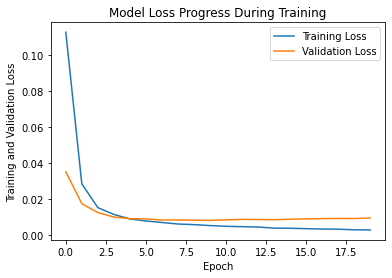

In [63]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

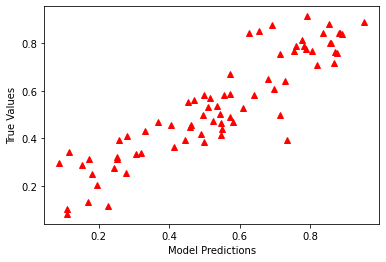

In [64]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [65]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


Text(0, 0.5, 'True Values')

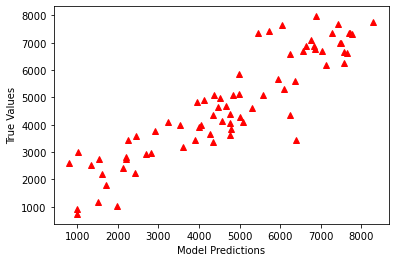

In [66]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [67]:
k = X_test.shape[1]
n = len(X_test)
n

74

In [68]:


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 876.807 
MSE = 768790.2417790537 
MAE = 677.4226346402555 
R2 = 0.821182241247306 
Adjusted R2 = 0.6564816739750878
